## EasyVisa Project


## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competition. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
visa = pd.read_csv('/content/drive/MyDrive/EasyVisa.csv')##  Fill the blank to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [ ]:
data.head(5) ##  Complete the code to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail(5) ##  Complete the code to view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [ ]:
data.describe() ##  Complete the code to print the statistical summary of the data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Fixing the negative values in number of employees columns

In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [ ]:
data["no_of_employees"] = data["no_of_employees"].abs()

In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(0, 12)

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
# checking the number of unique values
data["case_id"].unique() ## Complete the code to check unique values in the mentioned column

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [ ]:
data.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

#### Observations on number of employees

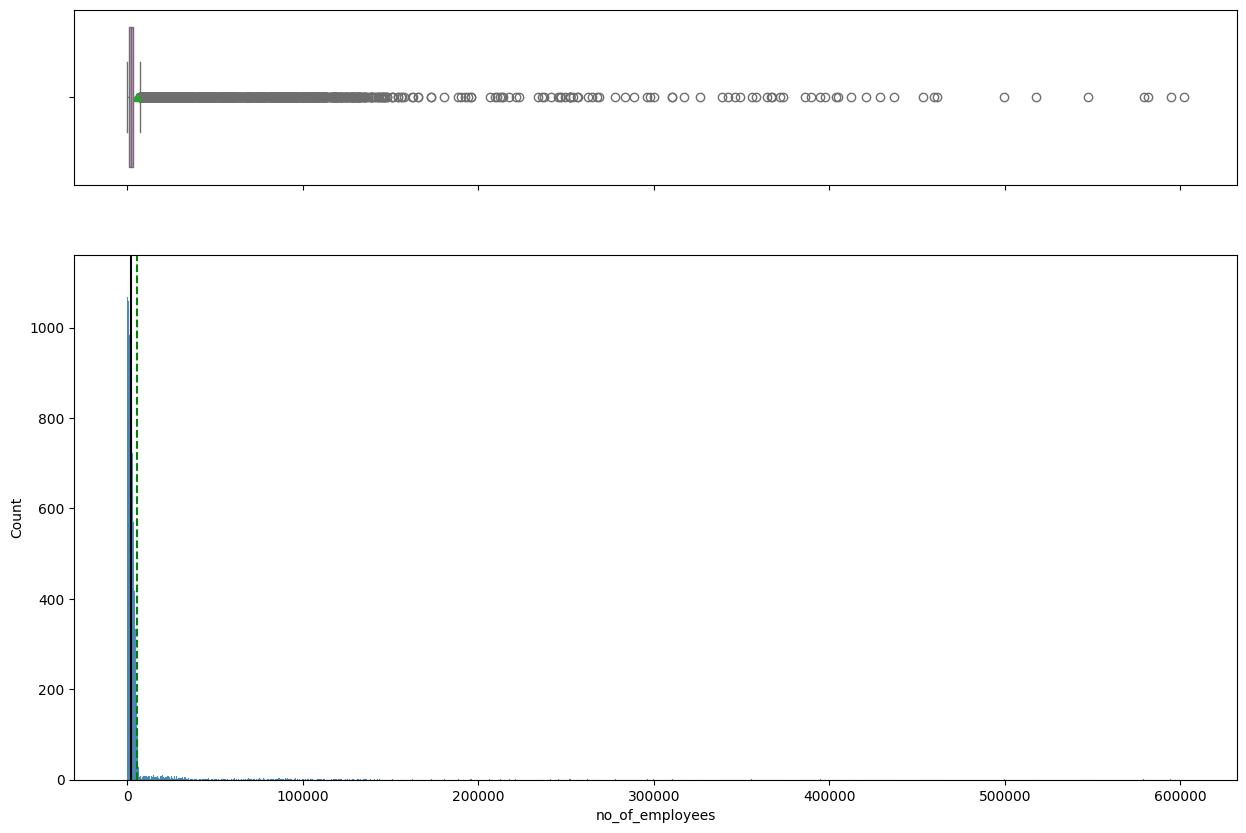

In [ ]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

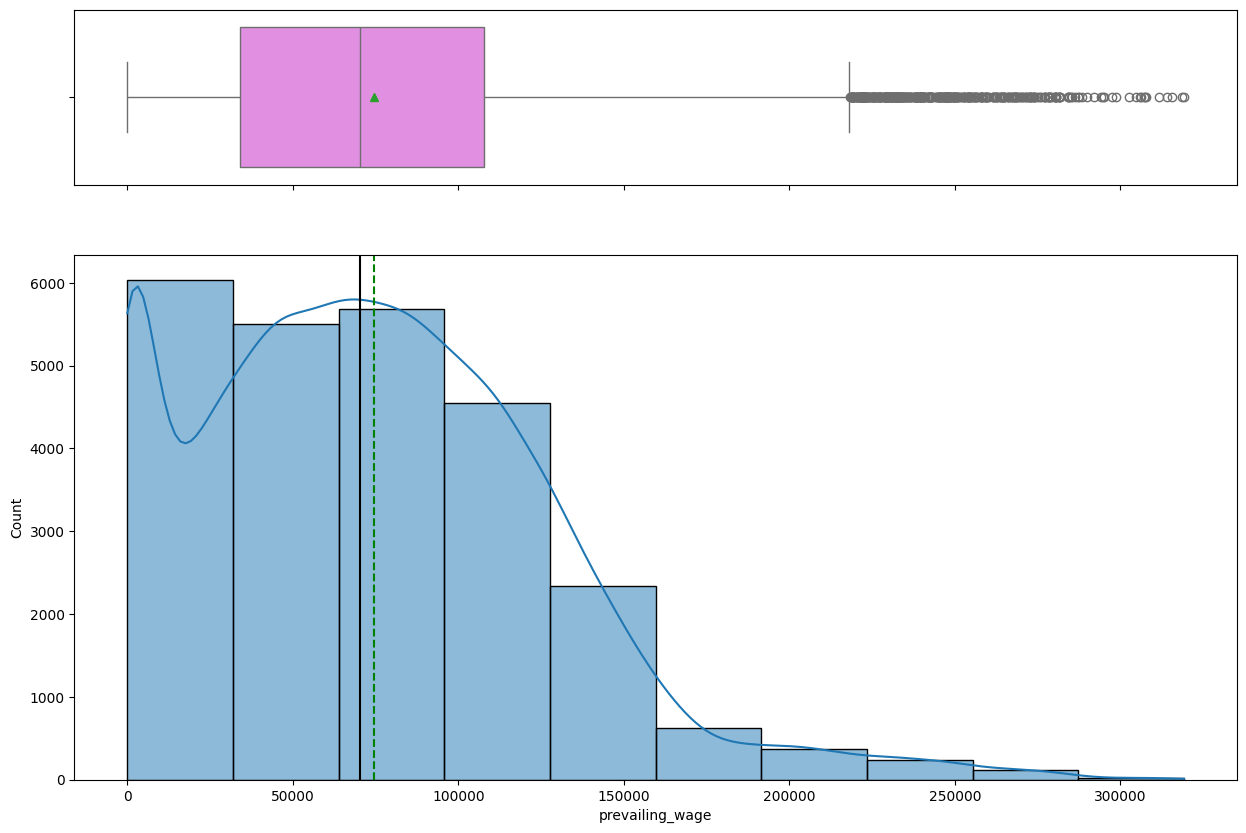

In [ ]:
histogram_boxplot(data, 'prevailing_wage', kde=True, bins=10)
 ## Complete the code to create histogram_boxplot for prevailing wage

In [ ]:
# checking the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage'] < 100].shape ## Complete the code to find the rows with less than 100 prevailing wage

(176, 11)

In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts() ## Complete the code to get the count of the values in the mentioned column

,unit_of_wage
Hour,176


#### Observations on continent

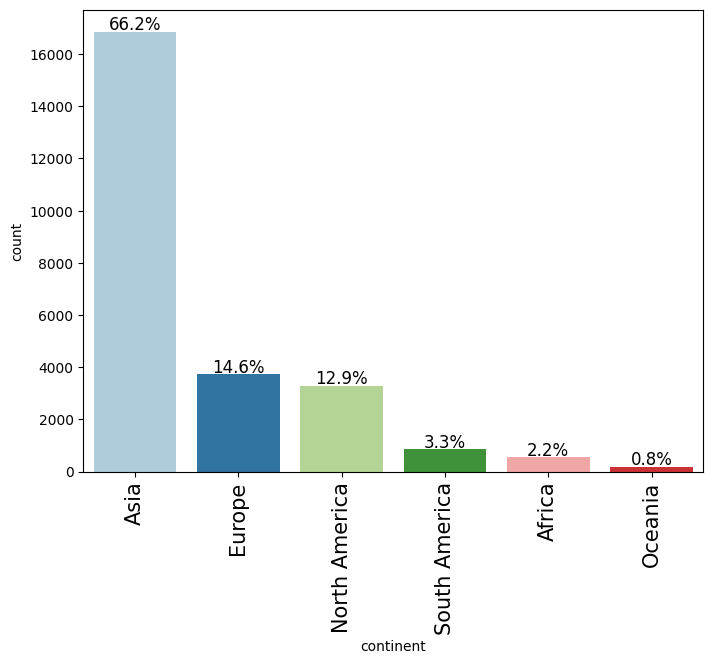

In [ ]:
labeled_barplot(data, "continent", perc=True)

#### Observations on education of employee

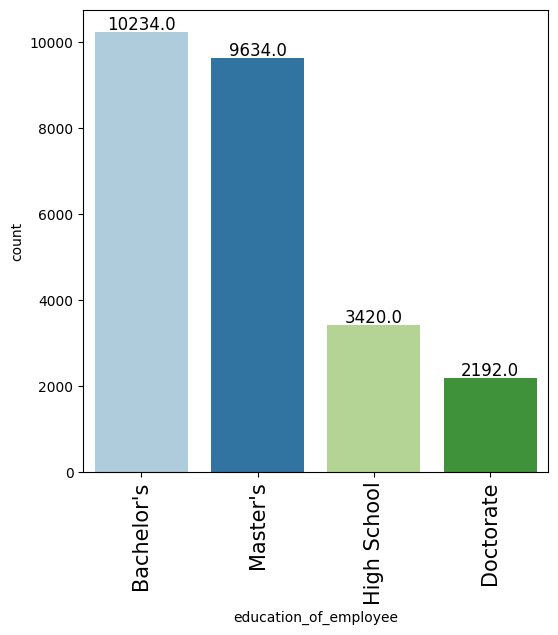

In [ ]:
labeled_barplot(data, 'education_of_employee')  ## Complete the code to create labeled_barplot for education of employee

#### Observations on job experience

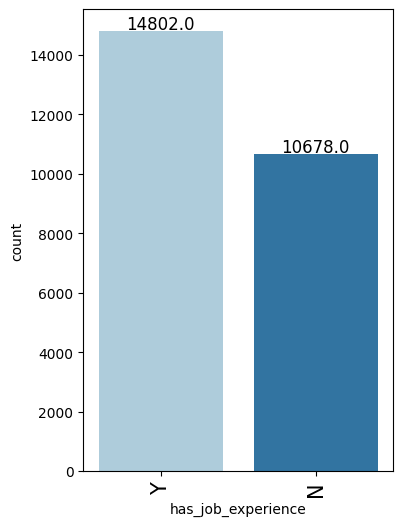

In [ ]:
labeled_barplot(data, 'has_job_experience')  ## Complete the code to create labeled_barplot for job experience

#### Observations on job training

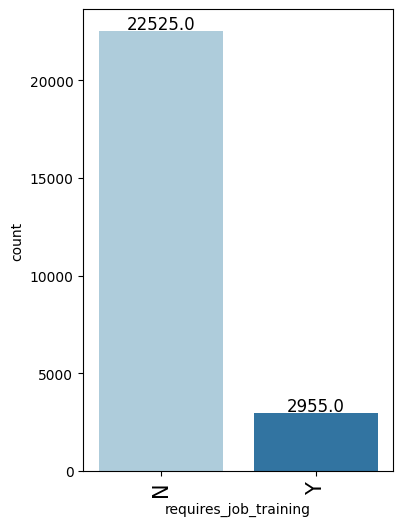

In [ ]:
labeled_barplot(data,'requires_job_training')  ## Complete the code to create labeled_barplot for job training

#### Observations on region of employment

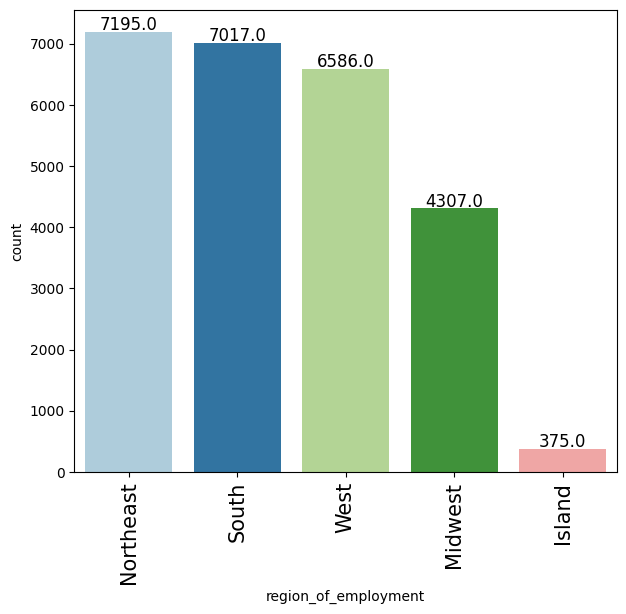

In [ ]:
labeled_barplot(data, 'region_of_employment')  ## Complete the code to create labeled_barplot for region of employment

#### Observations on unit of wage

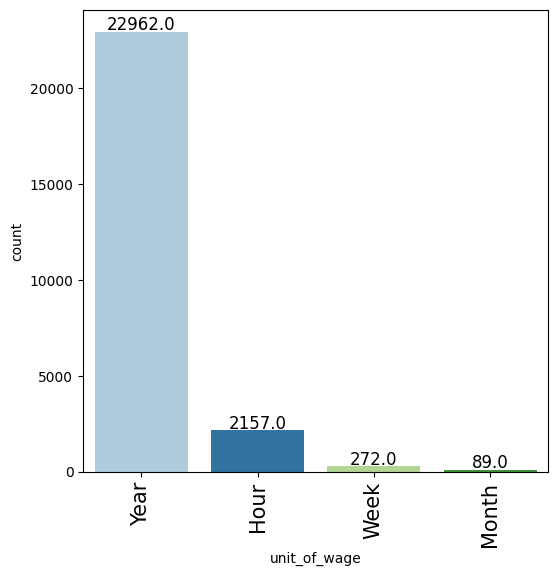

In [ ]:
labeled_barplot(data, 'unit_of_wage')  ## Complete the code to create labeled_barplot for unit of wage

#### Observations on case status

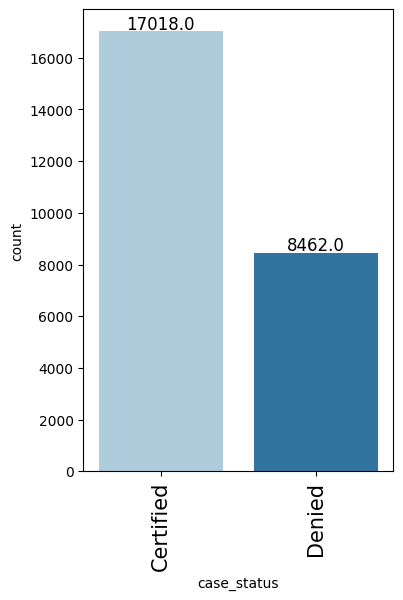

In [ ]:
labeled_barplot(data, 'case_status')  ## Complete the code to create labeled_barplot for case status

### Bivariate Analysis

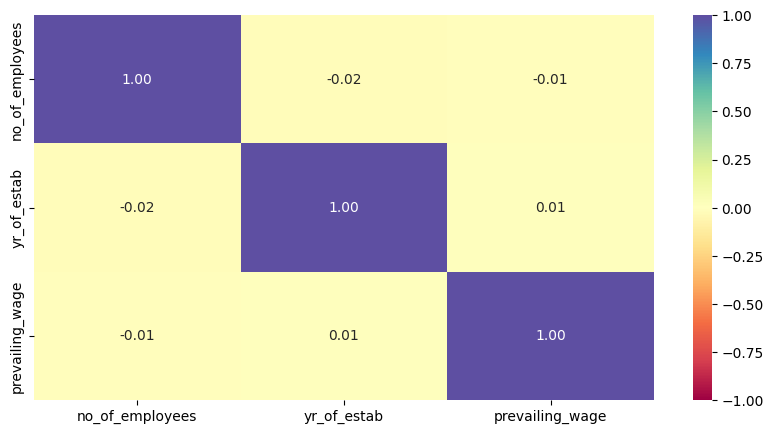

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


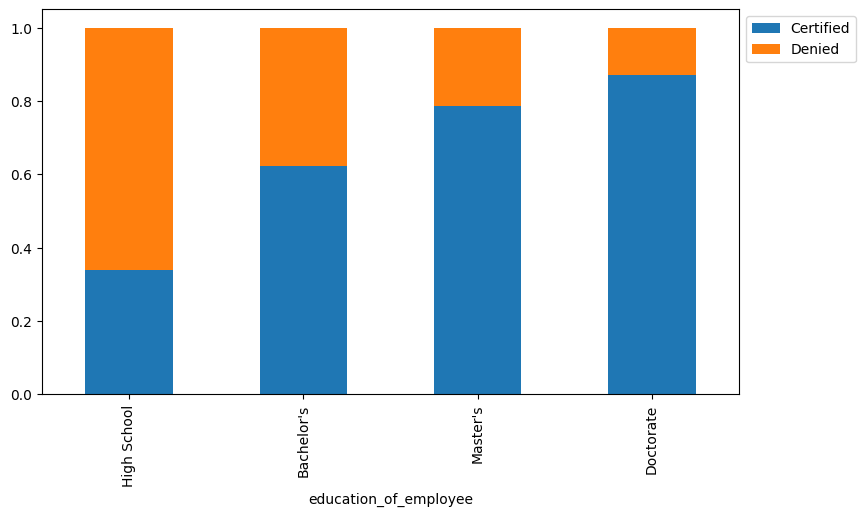

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

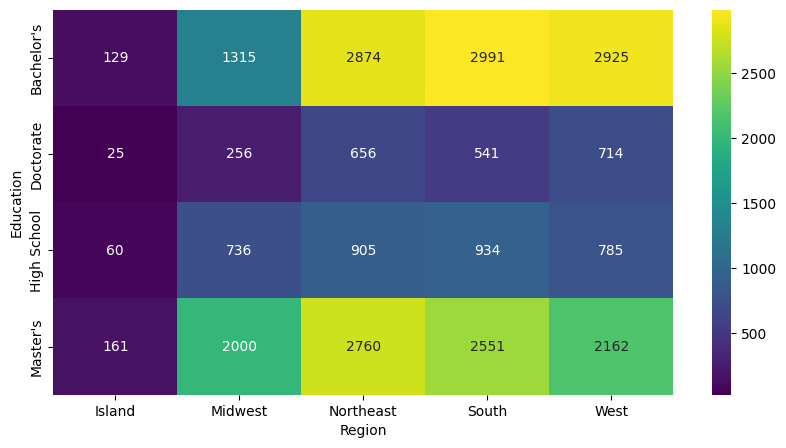

In [ ]:
plt.figure(figsize=(10, 5))

# Create the crosstab between 'education_of_employee' and 'region_of_employment'
sns.heatmap(
    pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt="g",  # Format as general (without scientific notation)
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


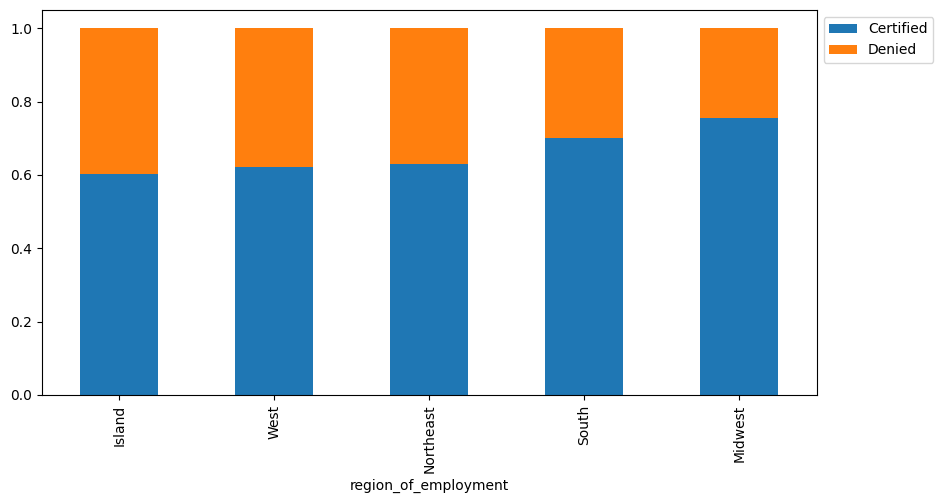

In [ ]:
stacked_barplot(data, 'region_of_employment', 'case_status') ## Complete the code to plot stacked barplot for region of employment and case status

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


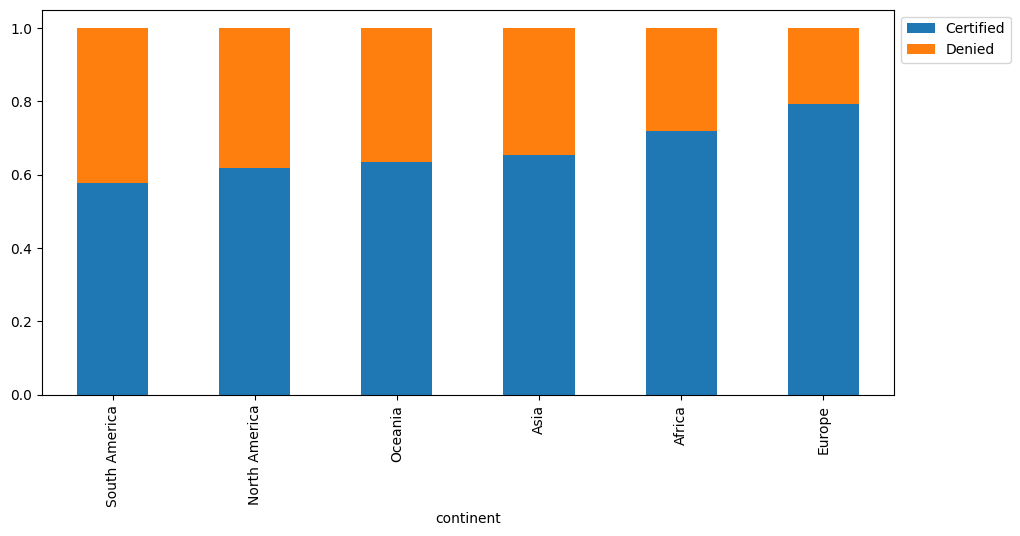

In [ ]:
stacked_barplot(data, 'continent', 'case_status') ## Complete the code to plot stacked barplot for continent and case status

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


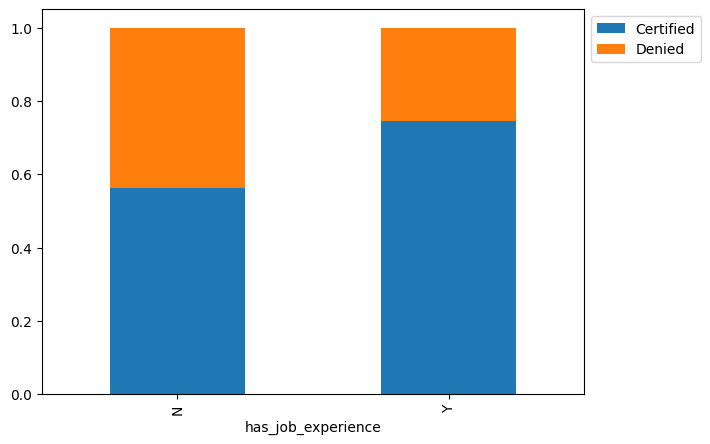

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status') ## Complete the code to plot stacked barplot for job experience and case status

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


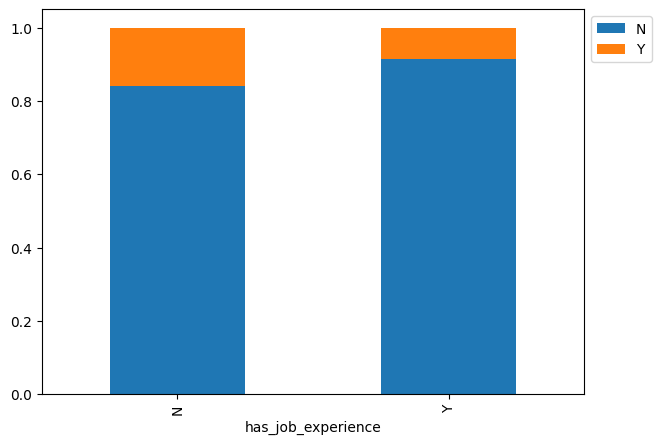

In [ ]:
stacked_barplot(data, 'has_job_experience', 'requires_job_training') ## Complete the code to plot stacked barplot for job experience and requires_job_training

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

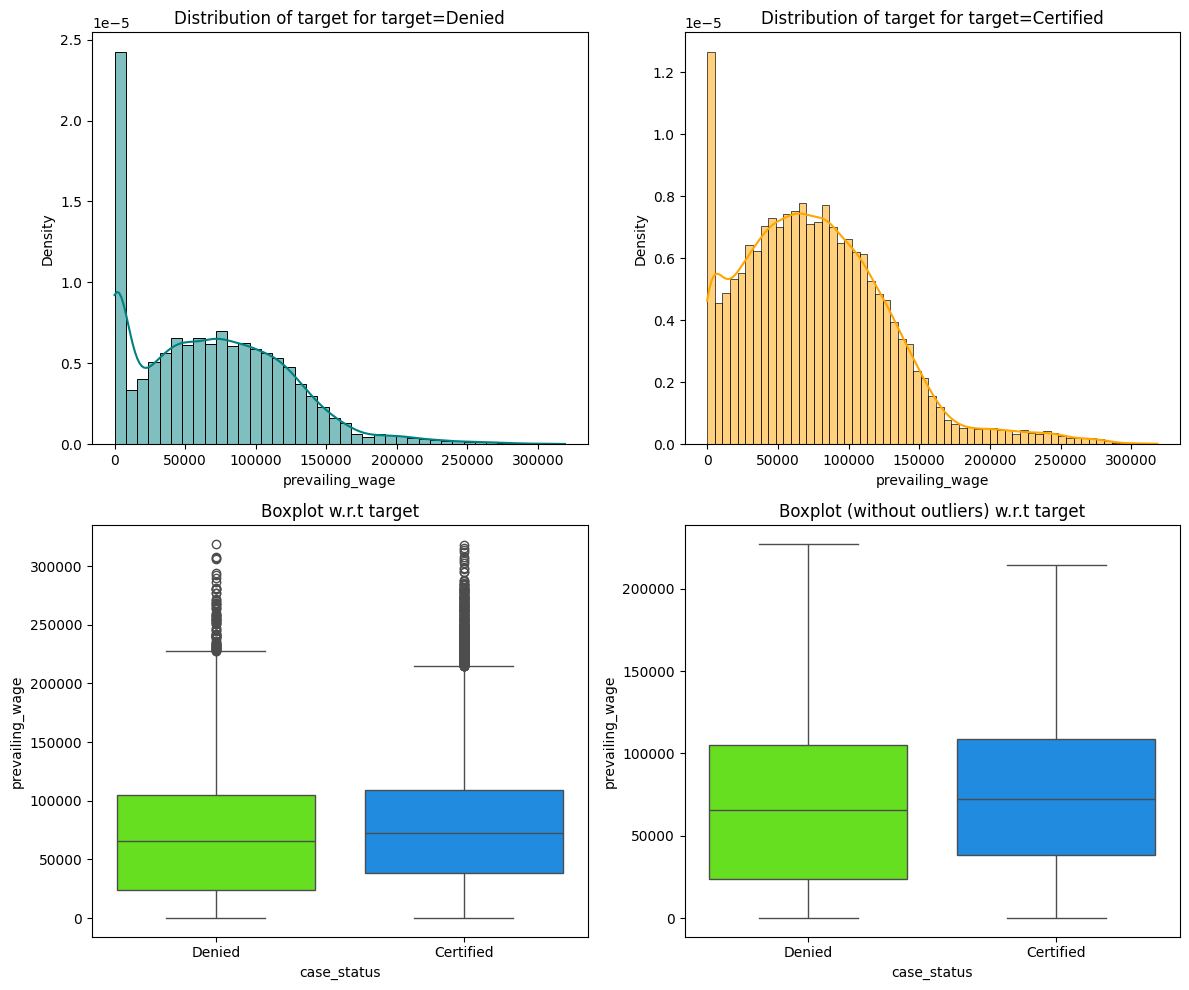

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status') ## complete the code to find distribution of prevailing wage and case status

#### Checking if the prevailing wage is similar across all the regions of the US

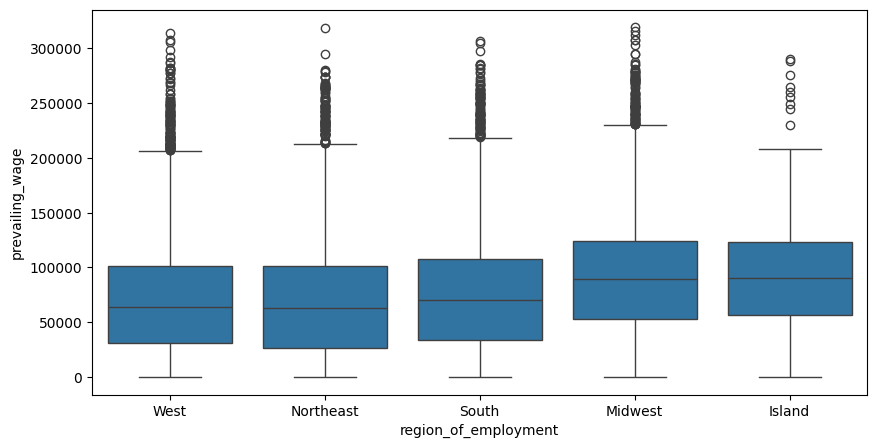

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='region_of_employment', y='prevailing_wage') ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


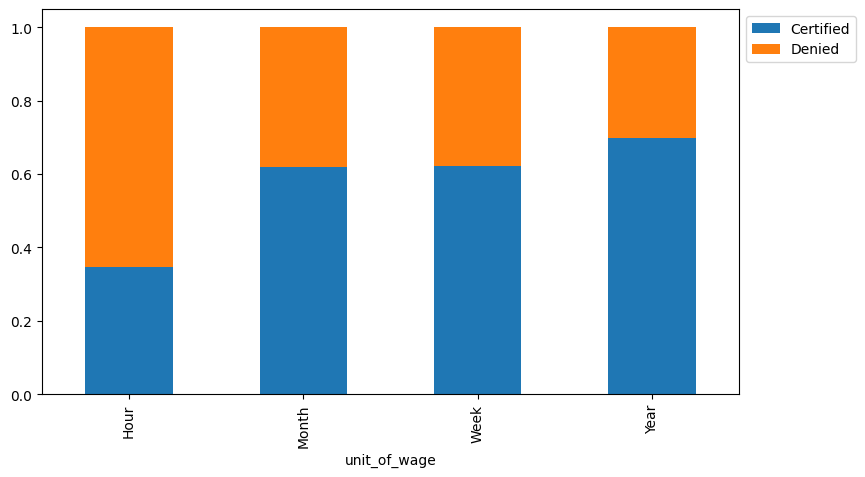

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status') ## the code to plot stacked barplot for unit of wage and case status

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

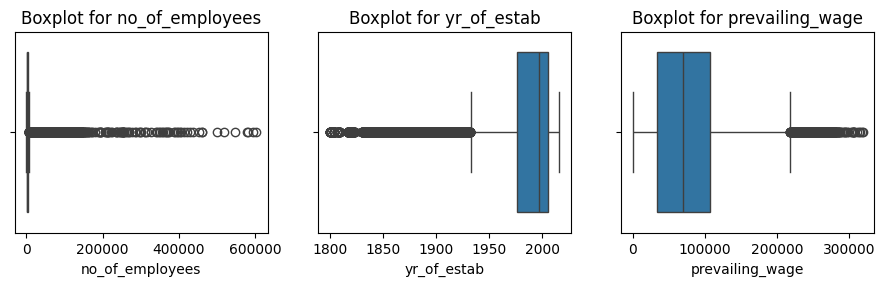

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)  # Adjust the grid size based on the number of numeric columns
    sns.boxplot(data=data, x=variable)
    plt.title(f'Boxplot for {variable}')
plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Step 1: Drop 'case_status' from the features (X)
X = data.drop(columns=['case_status'])

# Step 2: Create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Step 3: Define the target variable (Y)
Y = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# Step 4: Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
# Step 1: Define the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=1)

# Step 2: Fit the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
y_train_pred = model.predict(X_train)

# Create the confusion matrix for the train data
cm_train = confusion_matrix(y_train, y_train_pred)

print(cm_train)

[[ 5923     0]
 [    0 11913]]


In [ ]:
from sklearn.metrics import classification_report
def model_performance_classification_sklearn(model, X_train, y_train):
    y_train_pred = model.predict(X_train)
    return classification_report(y_train, y_train_pred)

# Check performance on the train data
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
print(decision_tree_perf_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00     11913

    accuracy                           1.00     17836
   macro avg       1.00      1.00      1.00     17836
weighted avg       1.00      1.00      1.00     17836



#### Checking model performance on test set

In [ ]:
y_pred_test_dt = model.predict(X_test)

# Generate the confusion matrix for the test data
conf_matrix_test_dt = confusion_matrix(y_test, y_pred_test_dt)

# Display the confusion matrix
print(conf_matrix_test_dt)

[[1290 1249]
 [1313 3792]]


#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_estimator, param_grid=parameters, scoring=scorer, n_jobs=-1, cv=5)

# Fit the grid search on the train data
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions on the test data
y_test_pred = model.predict(X_test)

# Create the confusion matrix for the test data
cm_test = confusion_matrix(y_test, y_test_pred)

print(cm_test)

[[1290 1249]
 [1313 3792]]


In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(model, X_train, y_train)
print(dtree_estimator_model_train_perf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00     11913

    accuracy                           1.00     17836
   macro avg       1.00      1.00      1.00     17836
weighted avg       1.00      1.00      1.00     17836



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the predictions using the trained model on the test set
y_pred_test = model.predict(X_test)

# Create the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
print(cm_test)

[[1290 1249]
 [1313 3792]]


In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(model, X_test, y_test)

# Display the performance metrics
print(dtree_estimator_model_test_perf)

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      2539
           1       0.75      0.74      0.75      5105

    accuracy                           0.66      7644
   macro avg       0.62      0.63      0.62      7644
weighted avg       0.67      0.66      0.67      7644



## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the Bagging classifier with a Decision Tree base estimator and random_state = 1
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

# Fit the Bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the train data
y_train_pred = bagging_classifier.predict(X_train)

# Create confusion matrix for the train data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix
print(conf_matrix_train)

[[ 5826    97]
 [  167 11746]]


In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      5923\n           1       0.99      0.99      0.99     11913\n\n    accuracy                           0.99     17836\n   macro avg       0.98      0.98      0.98     17836\nweighted avg       0.99      0.99      0.99     17836\n'

#### Checking model performance on test set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predicting on the test set
y_pred_test = bagging_classifier.predict(X_test)

# Generating confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
conf_matrix_test

array([[1385, 1154],
       [1204, 3901]])

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

'              precision    recall  f1-score   support\n\n           0       0.53      0.55      0.54      2539\n           1       0.77      0.76      0.77      5105\n\n    accuracy                           0.69      7644\n   macro avg       0.65      0.65      0.65      7644\nweighted avg       0.69      0.69      0.69      7644\n'

### Hyperparameter Tuning - Bagging Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

# Choose the type of classifier
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5, 0.7, 1],
    "n_estimators": np.arange(50, 110, 25),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=bagging_estimator_tuned, param_grid=parameters, cv=5, scoring=acc_scorer)

# Fit the grid search on the train data
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on train data using the tuned estimator
y_train_pred = bagging_estimator_tuned.predict(X_train)

# Create confusion matrix for train data on tuned estimator
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix
print(train_confusion_matrix)

[[ 5856    67]
 [    1 11912]]


In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)

# Display the performance metrics
print(bagging_estimator_tuned_model_train_perf)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5923
           1       0.99      1.00      1.00     11913

    accuracy                           1.00     17836
   macro avg       1.00      0.99      1.00     17836
weighted avg       1.00      1.00      1.00     17836



#### Checking model performance on test set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred_test = bagging_estimator_tuned.predict(X_test)

# Create confusion matrix for test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix
print(confusion_matrix_test)

[[ 965 1574]
 [ 534 4571]]


In [ ]:
# Use the previously created function to check performance for the test data on the tuned estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)

# Display the performance metrics for test data
bagging_estimator_tuned_model_test_perf

'              precision    recall  f1-score   support\n\n           0       0.64      0.38      0.48      2539\n           1       0.74      0.90      0.81      5105\n\n    accuracy                           0.72      7644\n   macro avg       0.69      0.64      0.65      7644\nweighted avg       0.71      0.72      0.70      7644\n'

### Random Forest

In [ ]:
# Fitting the model
from sklearn.ensemble import RandomForestClassifier

# Define the random forest estimator
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')

# Fit the model on the train data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the values on the train data
y_train_pred = rf_estimator.predict(X_train)

# Create the confusion matrix for train data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix
conf_matrix_train

array([[ 5923,     0],
       [    0, 11913]])

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      5923\n           1       1.00      1.00      1.00     11913\n\n    accuracy                           1.00     17836\n   macro avg       1.00      1.00      1.00     17836\nweighted avg       1.00      1.00      1.00     17836\n'

#### Checking model performance on test set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test data
y_pred_test = rf_estimator.predict(X_test)

# Create the confusion matrix for the test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
print(confusion_matrix_test)

[[1235 1304]
 [ 780 4325]]


In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

'              precision    recall  f1-score   support\n\n           0       0.61      0.49      0.54      2539\n           1       0.77      0.85      0.81      5105\n\n    accuracy                           0.73      7644\n   macro avg       0.69      0.67      0.67      7644\nweighted avg       0.72      0.73      0.72      7644\n'

### Hyperparameter Tuning - Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics

# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with cv = 5 and n_jobs = -1
grid_obj = GridSearchCV(estimator=rf_tuned, param_grid=parameters, cv=5, n_jobs=-1, scoring=acc_scorer)

# Fit the grid search on train data
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the train data using the tuned model
y_train_pred = rf_tuned.predict(X_train)

# Create the confusion matrix for train data
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Print the confusion matrix
print(train_confusion_matrix)

[[ 2774  3149]
 [  969 10944]]


In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

'              precision    recall  f1-score   support\n\n           0       0.74      0.47      0.57      5923\n           1       0.78      0.92      0.84     11913\n\n    accuracy                           0.77     17836\n   macro avg       0.76      0.69      0.71     17836\nweighted avg       0.76      0.77      0.75     17836\n'

#### Checking model performance on test set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred_test = rf_tuned.predict(X_test)

# Generate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
print(conf_matrix_test)

[[1053 1486]
 [ 516 4589]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred_test = rf_tuned.predict(X_test)

# Generate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
print(conf_matrix_test)

[[1053 1486]
 [ 516 4589]]


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define AdaBoost classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1)

# Fit AdaBoost classifier on the train data
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on train data
y_pred_train = ab_classifier.predict(X_train)

# Generate confusion matrix for train data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Display the confusion matrix
print(conf_matrix_train)

[[ 2598  3325]
 [ 1344 10569]]


In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

'              precision    recall  f1-score   support\n\n           0       0.66      0.44      0.53      5923\n           1       0.76      0.89      0.82     11913\n\n    accuracy                           0.74     17836\n   macro avg       0.71      0.66      0.67     17836\nweighted avg       0.73      0.74      0.72     17836\n'

#### Checking model performance on test set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred_test = ab_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
print(conf_matrix_test)

[[1095 1444]
 [ 587 4518]]


### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import numpy as np

# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": np.arange(0.01, 0.1, 0.05),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=abc_tuned, param_grid=parameters, scoring=acc_scorer, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the train data
y_pred_train_abc = abc_tuned.predict(X_train)

# Generate confusion matrix
conf_matrix_train_abc = confusion_matrix(y_train, y_pred_train_abc)

# Display the confusion matrix
print(conf_matrix_train_abc)

[[ 2926  2997]
 [ 1383 10530]]


#### Checking model performance on test set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test data using the tuned model
y_pred_test_abc = abc_tuned.predict(X_test)

# Generate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test_abc)

# Display the confusion matrix
print(conf_matrix_test)

[[1193 1346]
 [ 633 4472]]


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting Classifier with random_state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fit the Gradient Boosting Classifier on the training data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on the train data
y_pred_train_gb = gb_classifier.predict(X_train)

# Create confusion matrix for the train data
conf_matrix_train_gb = confusion_matrix(y_train, y_pred_train_gb)

# Display the confusion matrix
print(conf_matrix_train_gb)

[[ 3006  2917]
 [ 1385 10528]]


#### Checking model performance on test set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred_test_gb = gb_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix_test_gb = confusion_matrix(y_test, y_pred_test_gb)

# Display the confusion matrix
print(conf_matrix_test_gb)

[[1221 1318]
 [ 633 4472]]


### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the GradientBoostingClassifier (no need for init, you can adjust it as needed)
gbc = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 110, 25),
    "subsample": [0.7, 0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1, scoring=acc_scorer)

# Fit the grid search to the training data
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters found by the grid search
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.8, random_state=1,
                           subsample=0.9)

#### Checking model performance on training set

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict on training data
y_pred_train_gbc = gbc_tuned.predict(X_train)

# Generate confusion matrix for training data
conf_matrix_train_gbc = confusion_matrix(y_train, y_pred_train_gbc)

# Display the confusion matrix
print(conf_matrix_train_gbc)

[[ 2911  3012]
 [ 1362 10551]]


#### Checking model performance on test set

y_pred_train_gbc = gbc_tuned.predict(X_train)

# Get the performance metrics for the training data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(y_train, y_pred_train_gbc)

# Display the performance metrics
gbc_tuned_model_train_perf

In [ ]:
y_pred_test_gbc = gbc_tuned.predict(X_test)

# Generate confusion matrix for the test data
conf_matrix_test_gbc = confusion_matrix(y_test, y_pred_test_gbc)

# Display the confusion matrix
print(conf_matrix_test_gbc)

[[1191 1348]
 [ 620 4485]]


## Stacking Classifier

In [ ]:
# Define the base estimators for the stacking classifier
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned)
]

# Define the final estimator for the stacking classifier (e.g., RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
final_estimator = RandomForestClassifier(random_state=1)

# Import the StackingClassifier
from sklearn.ensemble import StackingClassifier

# Define the stacking classifier with the base estimators and the final estimator
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=RandomForestClassifier(random_state=1))

### Checking model performance on training set

In [ ]:
y_pred_train_stack = stacking_classifier.predict(X_train)

# Generate confusion matrix for train data
from sklearn.metrics import confusion_matrix
conf_matrix_train_stack = confusion_matrix(y_train, y_pred_train_stack)

# Display the confusion matrix
print(conf_matrix_train_stack)

[[ 2990  2933]
 [ 1689 10224]]


### Checking model performance on test set

In [ ]:
y_pred_test_stack = stacking_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix_test_stack = confusion_matrix(y_test, y_pred_test_stack)

# Display the confusion matrix
print(conf_matrix_test_stack)

[[1193 1346]
 [ 742 4363]]


## Model Performance Comparison and Final Model Selection

### Important features of the final model

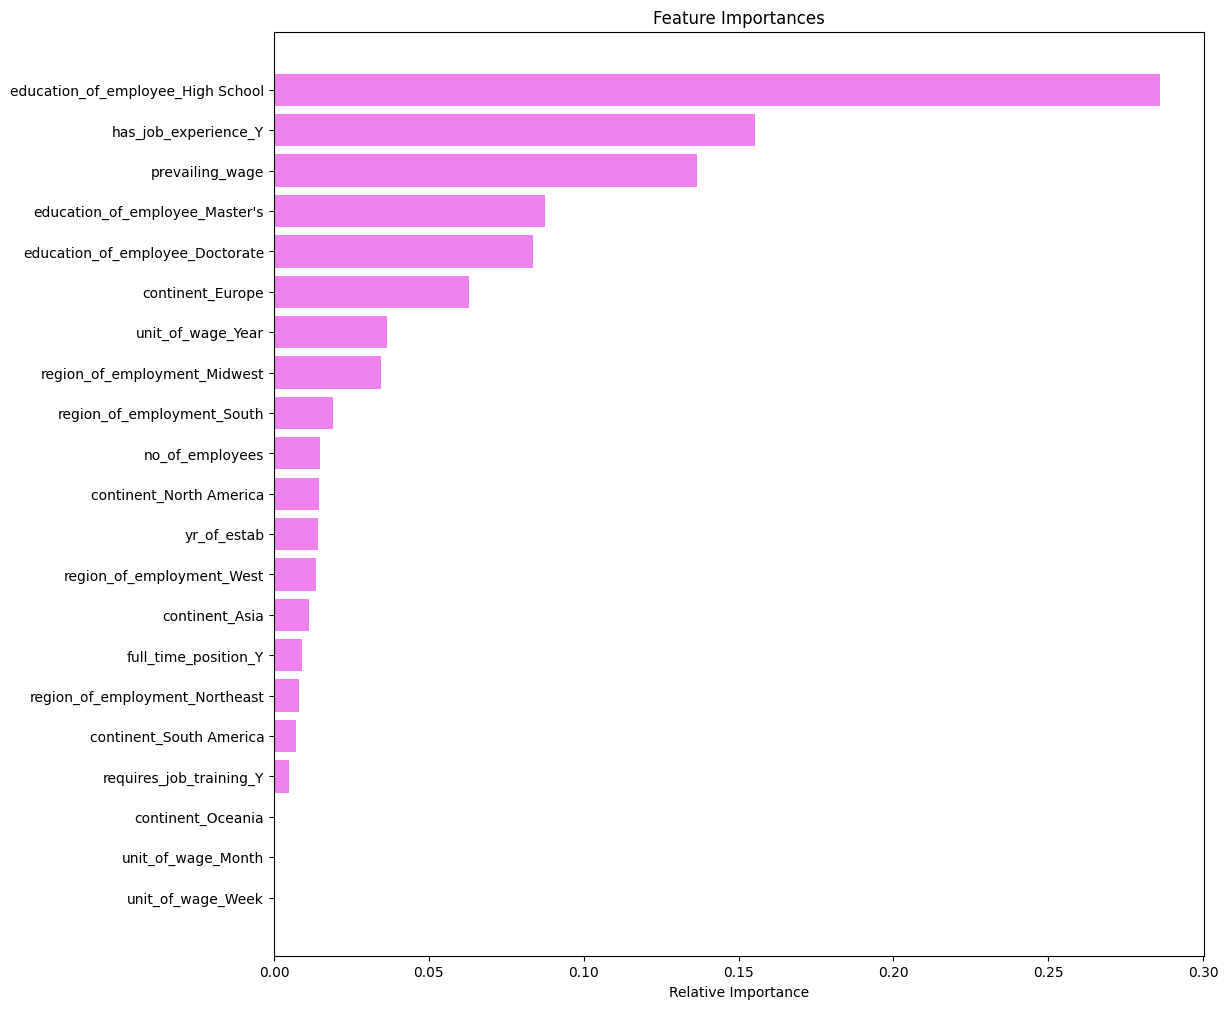

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

Key Findings:

Best Performance: The Stacking Classifier with base models like Random Forest and AdaBoost showed the best results after tuning.
Accuracy: The models achieved high accuracy and f1-scores, ensuring they can reliably predict visa approvals and denials.
Impact: The solution aims to reduce manual work for OFLC by automating visa classification, speeding up the approval process while maintaining accuracy.

Conclusion:

The developed machine learning model offers a reliable and efficient solution for predicting visa application outcomes, aiding OFLC in making data-driven decisions while addressing the increasing volume of applications.


___